In [1]:
import wang_low_rmp

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time
from datetime import datetime
import pickle

b2.defaultclock.dt = 0.10 * b2.ms



def pop_rate_to_dict(results):

    pop_rate_a = results["rate_monitor_A"]
    pop_rate_b = results["rate_monitor_B"]
    
    # pop_rate_a is a 

    smooth_pop_rate_a = pop_rate_a.smooth_rate(window="flat",width = 20.1*b2.ms )
    smooth_pop_rate_b = pop_rate_b.smooth_rate(window="flat",width = 20.1*b2.ms )

    np_rate_a = np.array(smooth_pop_rate_a)
    np_rate_b = np.array(smooth_pop_rate_b)



    time = pop_rate_a.t/b2.ms
    pop_rate_results = {}

    pop_rate_results['time'] =  time
    pop_rate_results['pop_rate_a'] =  np_rate_a
    pop_rate_results['pop_rate_b'] =  np_rate_b
    
    return pop_rate_results



stim_start = 100. * b2.ms
stim_duration = 300 * b2.ms

pop_rate_list = []

for i in range(100):

    print("stimulus start: {}, stimulus end: {}".format(stim_start, stim_start+stim_duration))
    results = wang_low_rmp.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                            t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                            coherence_level=+0.90, w_pos=2.0, mu0_mean_stimulus_Hz=500 * b2.Hz,
                                            max_sim_time=800. * b2.ms)
    
    pop_dict = pop_rate_to_dict(results)
    pop_rate_list.append(pop_dict)
    
    

curDT = datetime.now()
time = curDT.strftime("%m%d_%H_%M")

with open('low_rmp_80mV_pop_rate_' + time + '.pkl', 'wb') as f:
    pickle.dump(pop_rate_list, f)

INFO       Cache size for target "cython": 1920 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "C:\Users\msyoo7\.cython\brian_extensions" directory. [brian2]


stimulus start: 0.1, stimulus end: 0.4
simulating 426 neurons. Start: Thu Aug 11 18:17:41 2022


In [3]:
import pickle
with open('low_rmp80mV_pop_rate_0811_18_03.pkl', 'rb') as f:
    data = pickle.load(f)


In [6]:
import wang_low_rmp

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time
from datetime import datetime
import pickle


INFO       Cache size for target "cython": 1891 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "C:\Users\msyoo7\.cython\brian_extensions" directory. [brian2]


In [9]:
def plot_rate(pop_rate):
    rate_a = pop_rate['pop_rate_a']
    rate_b = pop_rate['pop_rate_b']
    time = pop_rate['time']
    plt.rcParams['font.size'] = 18

    
    
    plt.plot(time, rate_a,  linewidth= 2.5)
    plt.plot(time, rate_b, linewidth= 2.5)
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.legend(['Population A', 'Population B'])
    plt.show()

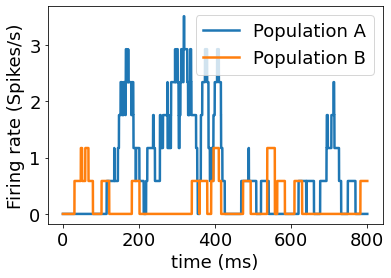

In [10]:
plot_rate(data[2])


In [11]:
def overlap_rate(data, start, end, trial_num):
    time = data[0]['time']

    for i in range(trial_num):
        
        plt.plot(time[start:end], data[i]['pop_rate_a'][start:end], 'c', alpha = 0.1, linewidth= 3)
        #plt.plot(time[start:end], data[i]['pop_rate_b'][start:end], 'r', alpha = 0.1, linewidth= 3)

        #plt.plot(time[start:end], data[median_index]['pop_rate_a'][start:end], 'k', alpha = 1, linewidth= 1)
        
        
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.show()


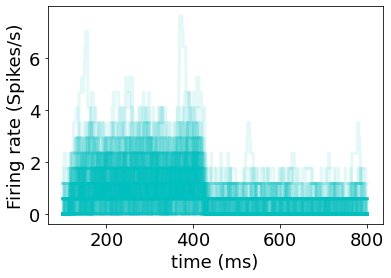

In [12]:
overlap_rate(data, 1000, 8000, 100)

In [13]:
import pickle
with open('low_rmp90mV_pop_rate_0811_15_56.pkl', 'rb') as f:
    data = pickle.load(f)

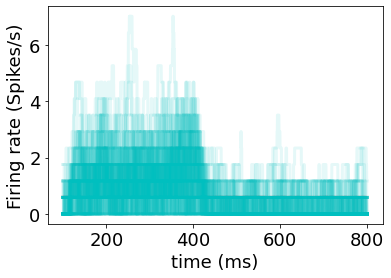

In [14]:
overlap_rate(data, 1000, 8000, 100)